# Preprocessing
> Contains all the steps necessary to do some basic pre-processing for the Kaggle house prices data.

In [ ]:
#default_exp preprocessing

In [ ]:
#hide
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#export
from zipfile import ZipFile
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from typing import List
from fastai2.tabular.all import *

from kaggle_house_prices.utils import *

In [ ]:
mpl.style.use("bmh")

## Downloading & extracting zip files

In [ ]:
#export
dir_raw_data = Path("../data/raw")
# competition = "house-prices-advanced-regression-techniques"
compressed_data_file = dir_raw_data/f"{competition}.zip"

In [ ]:
#hide
compressed_data_file

Path('../data/raw/house-prices-advanced-regression-techniques.zip')

In [ ]:
#hide
# !kaggle competitions download -c {competition} -p {dir_raw_data}

In [ ]:
#hide
# extract_zip_files(compressed_data_file)

In [ ]:
#export
train_path = dir_raw_data/"train.csv"
test_path = dir_raw_data/"test.csv"

In [ ]:
#hide
train_path, test_path

(Path('../data/raw/train.csv'), Path('../data/raw/test.csv'))

## Loading into data frames and visualizing

In [ ]:
#hide
df = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [ ]:
#hide
display_all(df.head().T)

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [ ]:
#hide
display_all(df_test.head().T)

,0,1,2,3,4
Id,1461,1462,1463,1464,1465
MSSubClass,20,20,60,60,120
MSZoning,RH,RL,RL,RL,RL
LotFrontage,80,81,74,78,43
LotArea,11622,14267,13830,9978,5005
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,IR1,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,HLS
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [ ]:
#export
dep_var = "SalePrice"

In [ ]:
#export
def show_dep_var(df:pd.DataFrame, dep_var:str, bins:int=50):
    "Shows the `dep_var` distribution, linear and logarithmic, side by side."
    bins = 50

    fig, axs = plt.subplots(ncols=2, figsize=(14,4))
    ax = axs[0]
    ax.hist(df[dep_var].values, bins=bins)
    ax.set_title(f"{dep_var}")
    ax = axs[1]
    ax.hist(np.log(df[dep_var].values), bins=bins)
    ax.set_title(f"log({dep_var})")
    plt.show()

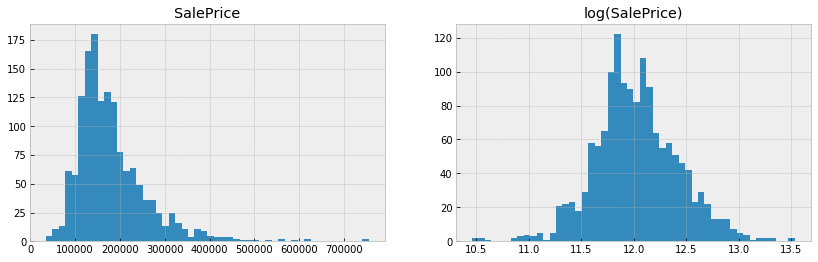

In [ ]:
show_dep_var(df, dep_var, bins=50)

In [ ]:
#hide
df[dep_var] = df[dep_var].apply(np.log)

## Cleaning the data

Imputing NaN values for continuous columns and flagging of NaNs with new `_na` columns.

In [ ]:
#export
cont_names = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
              'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
              'WoodDeckSF', 'OpenPorchSF', 'LotFrontage', 'BsmtFinSF1', 'LowQualFinSF',]

In [ ]:
display_all(df.loc[:, cont_names].describe().T)

,count,mean,std,min,25%,50%,75%,max
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0


In [ ]:
#export
def show_na_share(df:pd.DataFrame, cols:List[str]):
    "Prints the share of NaN values by column"
    for col in cols: 
        if df[col].hasnans: 
            print(f"{col}: {df[col].isna().sum()/len(df)*100:.2f} %")

In [ ]:
show_na_share(df, cont_names)

MasVnrArea: 0.55 %
GarageYrBlt: 5.55 %
LotFrontage: 17.74 %


In [ ]:
#export
cat_names = ['Id', 'MSSubClass', 'MSZoning', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleType',
       'SaleCondition']

In [ ]:
show_na_share(df, cat_names)

Alley: 93.77 %
MasVnrType: 0.55 %
BsmtQual: 2.53 %
BsmtCond: 2.53 %
BsmtExposure: 2.60 %
BsmtFinType1: 2.53 %
BsmtFinType2: 2.60 %
Electrical: 0.07 %
FireplaceQu: 47.26 %
GarageType: 5.55 %
GarageFinish: 5.55 %
GarageQual: 5.55 %
GarageCond: 5.55 %
PoolQC: 99.52 %
Fence: 80.75 %
MiscFeature: 96.30 %


Setting categories

In [ ]:
for col in cat_names:
    df[col] = pd.Categorical(df[col], ordered=True)

## Sub-sampling 

To accelerate the turnaround time during model development lets do some sub-sampling of `n` samples, without replacement.

In [ ]:
#hide
small_sample = True
n = 100

In [ ]:
#export
def do_sample(df:pd.DataFrame, small_sample:bool, n:int=100) -> pd.DataFrame:
    "Generates samples from `df`."
    if small_sample:
        _df = df.sample(n=n)
    else:
        _df = df.copy(deep=True)
    return _df

In [ ]:
df_s = do_sample(df, small_sample=small_sample, n=n)
len(df_s), len(df)

(100, 1460)

In [ ]:
#hide
assert len(df_s) == n

In [ ]:
#hide
assert len(set(df.columns).symmetric_difference(df_s.columns)) == 0

## Splitting into train and validation set

Using `get_split`, the data is split using the underlying order adding a `valid` columns indicating the set affiliation. If the dataframe is ordered, e.g. increasingly along a time column, then `valid_pct` determines the number of the last rows to use in the validation set. All values before are then training samples.

In [ ]:
#export
val_col = "is_valid"

def get_split(df:pd.DataFrame, valid_pct:float=.2, val_col="is_valid") -> pd.DataFrame:
    "Splitting the data frame into train and validation set, creating a new `val_col` column"
    valid_idx = np.arange(int((1-valid_pct)*len(df)), len(df))
    train_idx = np.setdiff1d(np.arange(len(df)), valid_idx)
    df[val_col] = False
    df.iloc[valid_idx, df.columns.get_loc(val_col)] = True
    return df

In [ ]:
df_s = get_split(df_s, valid_pct=.2)

In [ ]:
#hide
assert len(df_s.columns) == len(df.columns)+1

In [ ]:
df_s[val_col].value_counts()

False    80
True     20
Name: is_valid, dtype: int64

## Dealing with unexpected missing values (continuous)

In [ ]:
#export
def deal_with_continuous_nans(df_ref:pd.DataFrame, df_new, cont_names:list, cont_fill_vals:dict):
    "Fills nans in columns of `df_new` if they are unexpected based on `df_ref`"
    for col in cont_names:
        reference_set_has_nan = pd.isnull(df_ref[col]).any()
        new_set_has_nan = pd.isnull(df_new[col]).any()
        
        if new_set_has_nan and not reference_set_has_nan:
            df_new[col].fillna(cont_fill_vals[col], inplace=True)
    return df_new

In [ ]:
%%time
cont_fill_vals = {col: np.nanmedian(df_s.loc[df_s[val_col]==False, col]) for col in cont_names}
cont_fill_vals

CPU times: user 9.38 ms, sys: 230 µs, total: 9.61 ms
Wall time: 9.81 ms


{'LotArea': 8989.0,
 'YearBuilt': 1977.0,
 'YearRemodAdd': 1993.5,
 'MasVnrArea': 0.0,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 487.0,
 'TotalBsmtSF': 1023.0,
 '1stFlrSF': 1058.5,
 '2ndFlrSF': 0.0,
 'GrLivArea': 1341.5,
 'GarageYrBlt': 1988.0,
 'GarageArea': 462.0,
 'WoodDeckSF': 70.0,
 'OpenPorchSF': 27.5,
 'LotFrontage': 65.0,
 'BsmtFinSF1': 391.5,
 'LowQualFinSF': 0.0}

In [ ]:
ix_train = df_s[val_col]==False
df_s.loc[~ix_train,:] = deal_with_continuous_nans(df_s.loc[ix_train,:], df_s.loc[~ix_train,:], 
                                                  cont_names, cont_fill_vals)

In [ ]:
splits = ColSplitter(col=val_col)(df_s)
to = TabularPandas(df_s, procs=[Categorify, FillMissing, Normalize], cat_names=cat_names, cont_names=cont_names,
                   y_names=dep_var, splits=splits)

## Inspecting `TabularPandas` mappinds

Going over categorical mappings where `Categorify` did not make one-hot encodings sanity checking train and validation set encodings

In [ ]:
#export
def inspect_category_mappings(cat_names:List[str], df:pd.DataFrame, splits:ColSplitter, 
                              to:TabularPandas, n_max:int=None):
    "Shows unique original and transformed discrete values side by side for sanity checks"
    for i, col in enumerate(cat_names):
        print(f"\nColumn: {col}")
        _df = (pd.DataFrame({"original-train": df.iloc[splits[0]][col], "categorified-train": to.train.xs[col]})
               .drop_duplicates()
               .sort_values("categorified-train"))
        display_all(_df.head())
        _df = (pd.DataFrame({"original-valid": df.iloc[splits[1]][col], "categorified-valid": to.valid.xs[col]})
               .drop_duplicates()
               .sort_values("categorified-valid"))
        display_all(_df.head())

        if n_max is not None and i+1 == n_max:
            break

In [ ]:
inspect_category_mappings(cat_names, df_s, splits, to, n_max=1)


Column: Id


,original-train,categorified-train
16,17,17
19,20,20
24,25,25
64,65,65
85,86,86


,original-valid,categorified-valid
77,78,78
153,154,154
189,190,190
229,230,230
237,238,238


## Exporting `TabularPandas` instance

Necessary step for the subsequent modelling step.

In [ ]:
#export
model_data_path = "model_data.pckl"

In [ ]:
with open(model_data_path, "wb") as f:
    pickle.dump(to, f)

## Exporting to csv

This can be useful as an intermediate step if you want to look at the data using another visualization tool. Using a visualization tool can be useful to inspect any unwanted artfiacts or skewness of the cleaned data.

In [ ]:
#export
clean_data_path = dir_raw_data.parent/"train_clean.csv"
clean_test_data_path = dir_raw_data.parent/"test_clean.csv"
clean_data_path_feather = dir_raw_data.parent/"train_clean.feather"
clean_test_data_path_feather = dir_raw_data.parent/"test_clean.feather"

In [ ]:
clean_data_path, clean_test_data_path

(Path('../data/train_clean.csv'), Path('../data/test_clean.csv'))

In [ ]:
df_s.to_csv(clean_data_path, index=False, encoding="utf8")
df_test.to_csv(clean_test_data_path, index=False, encoding="utf8")

In [ ]:
df_s.reset_index().to_feather(clean_data_path_feather)
df_test.reset_index().to_feather(clean_test_data_path_feather)

ImportError: Missing optional dependency 'pyarrow'.  Use pip or conda to install pyarrow.